# Análisis de Insertion Sort por Jefferson Daniel Castro Aguilar

Importamos itertools, numpy y matplotlib.pyplot y los renombramos como its, np y plt para usarlos en este proyecto

In [1]:
import itertools as its
import numpy as np
import matplotlib.pyplot as plt

Número al cual se le va a generar permutaciones

In [2]:
N = 4

## Generador de Permutaciónes usando Itertools

generamos todas las permutaciones posibles desde 1 hasta N numeros

In [3]:
perm = list(its.permutations(range(1,N+1)))

Implementaciones de Instertion Sort, una propia y otra basada en el libro de Cormen:

In [4]:
def insertion_sort_mine(arr):
    aux = arr[:]
    for i in range(1,len(aux)):
        k = i
        for j in range(i-1,-1,-1):
            if aux[j] > aux[k]:
                aux[k], aux[j] = aux[j], aux[k]
            else:
                break
            k = j
    return aux

In [5]:
def insertion_sort(A):
    aux = A[:]
    for i in range(1,len(aux)):
        x = aux[i];
        j = i-1
        while j > -1 and x < aux[j]:
            aux[j+1] = aux[j]
            j -= 1
        aux[j+1] = x
    return aux

### Estadisticas

Los contadores son para mirar las respectivas distribuciones de los diferentes aspectos de la complejidad del algoritmo Insertionsort
- Comparación entre las dos implementaciones

In [6]:
def insertion_sort_counter_mine(A):
    B = A[:]
    counter_inst = 0
    counter_comp = 0
    counter_swap = 0
    counter_while = 0
    for i in range(1,len(B)):        
        k = i
        for j in range(i-1,-1,-1):
            
            counter_while += 1
            
            if B[k] < B[j]:
                B[k], B[j] = B[j], B[k]
                
                counter_swap += 1
                counter_comp += 1 
                counter_inst += 2  
              
            else:
                counter_comp += 1  
                break               
                
            k = j
            
            counter_inst += 2
            
            
        counter_inst += 2
    return [counter_inst,counter_comp,counter_swap, counter_while]

In [7]:
def insertion_sort_counter(A):
    B = A[:]
    counter_inst = 0
    counter_comp = 0
    counter_swap = 0
    counter_while = 0
    for i in range(1,len(B)):
        x = B[i];
        j = i-1
        while j > -1 and x < B[j]:
            B[j+1] = B[j]
            j -= 1
            
            counter_swap += 1
            counter_comp += 1
            counter_inst += 3
            counter_while += 1
            
        counter_while += 1
        counter_inst += 1   
        
        if j!=-1:
            counter_comp += 1
                  
            
        B[j+1] = x
        
        counter_inst += 4
    counter_inst += 1
    return [counter_inst,counter_comp,counter_swap, counter_while]

Ahora declaramos dos listas en las que se guardaran los datos de los contadores de cada permutación.

Luego las convertimos en arrays de Numpy, lo que va a generar matrices de cantidad_de_permutaciones x 4 (de los cuatro tipos de contadores)

In [8]:
counters_list_mine = []
counters_list = []
for p in perm:
    counters_list_mine.append(insertion_sort_counter_mine(list(p)))
    counters_list.append(insertion_sort_counter(list(p)))
    
np_counters_list_mine = np.array(counters_list_mine)
np_counters_list = np.array(counters_list)

* #### Distribuciones de Lineas Ejecutadas

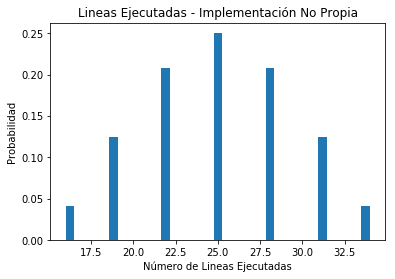

In [9]:
n = len(np_counters_list[:,0])
plt.hist(np_counters_list[:,0],bins=np_counters_list[:,0].max()+1,weights=np.linspace(1.0/n,1.0/n,n));
plt.xlabel("Número de Lineas Ejecutadas");
plt.ylabel("Probabilidad");
plt.title("Lineas Ejecutadas - Implementación No Propia");

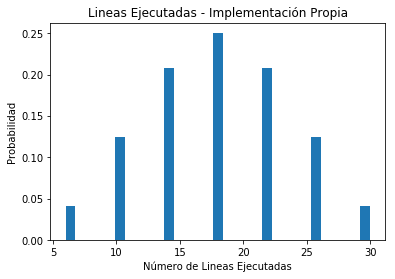

In [10]:
n = len(np_counters_list_mine[:,0])
plt.hist(np_counters_list_mine[:,0],bins=np_counters_list_mine[:,0].max()+1,weights=np.linspace(1.0/n,1.0/n,n));
plt.xlabel("Número de Lineas Ejecutadas");
plt.ylabel("Probabilidad");
plt.title("Lineas Ejecutadas - Implementación Propia");

* #### Distribución de Comparaciones entre Elementos

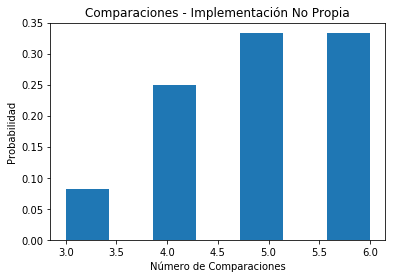

In [11]:
n = len(np_counters_list[:,1])
plt.hist(np_counters_list[:,1],bins=np_counters_list[:,1].max()+1,weights=np.linspace(1.0/n,1.0/n,n));
plt.xlabel("Número de Comparaciones");
plt.ylabel("Probabilidad");
plt.title("Comparaciones - Implementación No Propia");


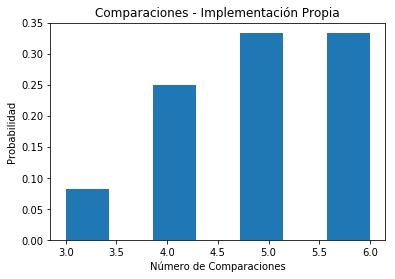

In [12]:
n = len(np_counters_list_mine[:,1])
plt.hist(np_counters_list_mine[:,1],bins=np_counters_list_mine[:,1].max()+1,weights=np.linspace(1.0/n,1.0/n,n));
plt.xlabel("Número de Comparaciones");
plt.ylabel("Probabilidad");
plt.title("Comparaciones - Implementación Propia");

* #### Distribución de Intercambios de Elementos

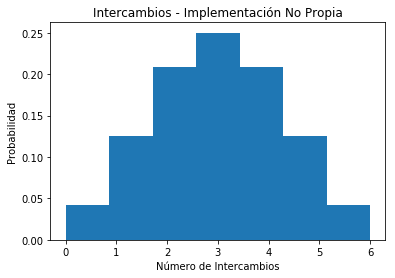

In [13]:
n = len(np_counters_list[:,2])
plt.hist(np_counters_list[:,2],bins=np_counters_list[:,2].max()+1,weights=np.linspace(1.0/n,1.0/n,n));
plt.xlabel("Número de Intercambios");
plt.ylabel("Probabilidad");
plt.title("Intercambios - Implementación No Propia");

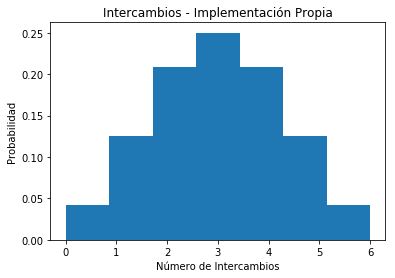

In [14]:
n = len(np_counters_list_mine[:,2])
plt.hist(np_counters_list_mine[:,2],bins=np_counters_list_mine[:,2].max()+1,weights=np.linspace(1.0/n,1.0/n,n));
plt.xlabel("Número de Intercambios");
plt.ylabel("Probabilidad");
plt.title("Intercambios - Implementación Propia");

* #### Distribución de Preguntas While

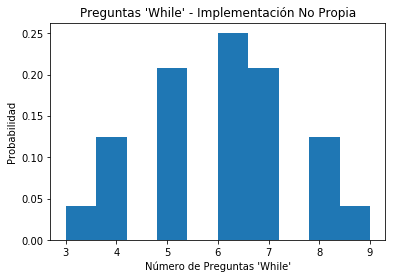

In [15]:
n = len(np_counters_list[:,3])
plt.hist(np_counters_list[:,3],bins=np_counters_list[:,3].max()+1,weights=np.linspace(1.0/n,1.0/n,n));
plt.xlabel("Número de Preguntas 'While'");
plt.ylabel("Probabilidad");
plt.title("Preguntas 'While' - Implementación No Propia");

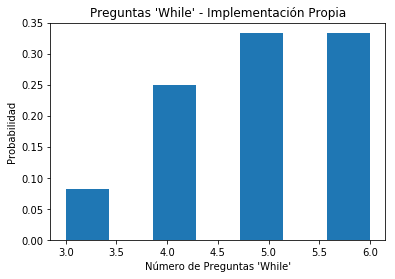

In [16]:
n = len(np_counters_list_mine[:,3])
plt.hist(np_counters_list_mine[:,3],bins=np_counters_list_mine[:,3].max()+1,weights=np.linspace(1.0/n,1.0/n,n),align='mid');
plt.xlabel("Número de Preguntas 'While'");
plt.ylabel("Probabilidad");
plt.title("Preguntas 'While' - Implementación Propia");

## Generador de Permutaciónes usando código de Daniel Jimenez

Las listas en los que se van a guardar los datos de los contadores para las estadísticas son:

In [17]:
counters_list_dj = []

El código adaptado de Daniel Jimenez para generar las permutaciones es:

In [18]:
def perm(v, i, n) :
    
    if i == n:
        counters_list_dj.append(insertion_sort_counter(v))
    else:
        
        for j in range(i,n):

            #swap (v, i, j);
            v[i] , v[j] = v[j] , v[i]                
            perm (v, i+1, n)
            #swap as it was
            v[i] , v[j] = v[j] , v[i]

Generamos las permutaciones recursivamente, calculando de una vez los contadores estadisticos usados para determinar las distribuciones para cada permutación.

In [19]:
perm(list(range(1,N+1)),0,N)

### Estadisticas

Similar a los que se hizo antes, con ayuda de Numpy volvemos las listas de los contadores estadisticos de cada permutación una matriz para más facilidad a la hora de gráficar

In [20]:
np_counters_list_dj = np.array(counters_list_dj)

Las distribuciones generadas son:

* #### Distribución de Lineas Ejecutadas

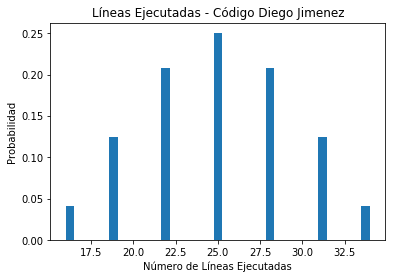

In [21]:
n = len(np_counters_list_dj[:,0])
plt.hist(np_counters_list_dj[:,0],bins=np_counters_list_dj[:,0].max()+1,weights=np.linspace(1.0/n,1.0/n,n));
plt.xlabel("Número de Líneas Ejecutadas");
plt.ylabel("Probabilidad");
plt.title("Líneas Ejecutadas - Código Diego Jimenez");

* #### Distribución de Comparaciones entre Elementos

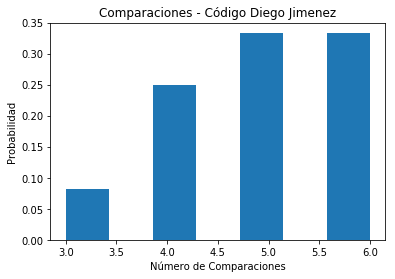

In [22]:
n = len(np_counters_list_dj[:,1])
plt.hist(np_counters_list_dj[:,1],bins=np_counters_list_dj[:,1].max()+1,weights=np.linspace(1.0/n,1.0/n,n));
plt.xlabel("Número de Comparaciones");
plt.ylabel("Probabilidad");
plt.title("Comparaciones - Código Diego Jimenez");

* #### Distribución de Intercambios de Elementos

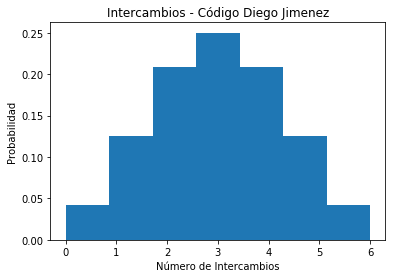

In [23]:
n = len(np_counters_list_dj[:,2])
plt.hist(np_counters_list_dj[:,2],bins=np_counters_list_dj[:,2].max()+1,weights=np.linspace(1.0/n,1.0/n,n));
plt.xlabel("Número de Intercambios");
plt.ylabel("Probabilidad");
plt.title("Intercambios - Código Diego Jimenez");

* #### Distribución de Intercambios de Elementos

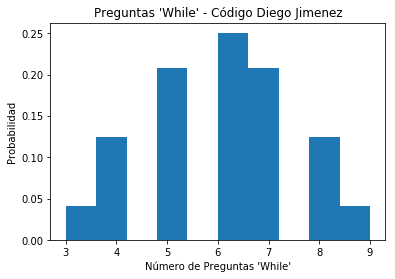

In [24]:
n = len(np_counters_list_dj[:,3])
plt.hist(np_counters_list_dj[:,3],bins=np_counters_list_dj[:,3].max()+1,weights=np.linspace(1.0/n,1.0/n,n));
plt.xlabel("Número de Preguntas 'While'");
plt.ylabel("Probabilidad");
plt.title("Preguntas 'While' - Código Diego Jimenez");